## Take Home Assignment 1

## Q1

In [1]:
import cv2;
import numpy as np; 
import matplotlib.pyplot as plt ;
from skimage import data;


In [6]:
def reduce_intensity_levels(image, levels):
    # Determine the step size for each intensity level
    steps = pow(2,levels)-1;
    print(steps);
    step = 255// steps;
    print("steps", step);
    
    # Create a blank image with the desired number of intensity levels
    reduced_image = np.zeros_like(image, dtype=np.uint8);
    # Iterate over each pixel in the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Find the corresponding intensity level for the pixel
            level = image[i, j]; 
            # Set the pixel value in the reduced image to the corresponding intensity level
            reduced_image[i, j] = round(level/step);
    
    return reduced_image;


Image shape: (512, 512)
Image dataType: <class 'numpy.ndarray'>
1
steps 255


<Figure size 432x288 with 0 Axes>

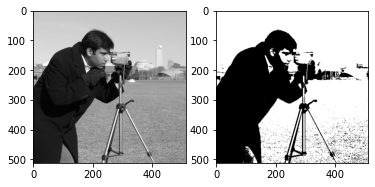

In [7]:
image = data.camera();
print("Image shape:", image.shape );
print("Image dataType:", type(image));

plt.gray();
f,arr = plt.subplots(1,2);
reduced = reduce_intensity_levels(image, 1);
arr[0].imshow(image);
arr[1].imshow(reduced);

## Q2

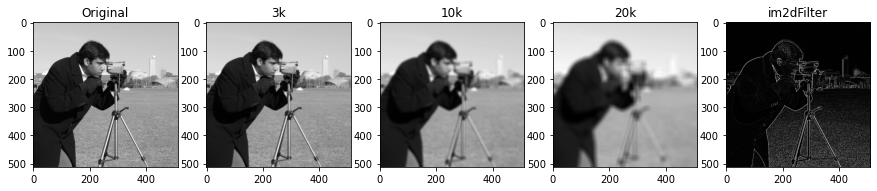

In [5]:
image = data.camera();
f,arr = plt.subplots(1,5,figsize=(15, 15));
plt.gray();
im3k = cv2.blur(image,(3,3));
im10k = cv2.blur(image,(10,10));
im20k = cv2.blur(image,(20,20));

kernel2 = np.array([[-1,-1,-1],
                  [-1,8,-1,],
                  [-1,-1,-1]]);

im2dFilter = cv2.filter2D(image,-1,kernel2);

arr[0].imshow(image);
arr[0].set_title('Original');

arr[1].imshow(im3k);
arr[1].set_title('3k');

arr[2].imshow(im10k);
arr[2].set_title('10k');

arr[3].imshow(im20k);
arr[3].set_title('20k');

arr[4].imshow(im2dFilter);
arr[4].set_title('im2dFilter');


## Q3

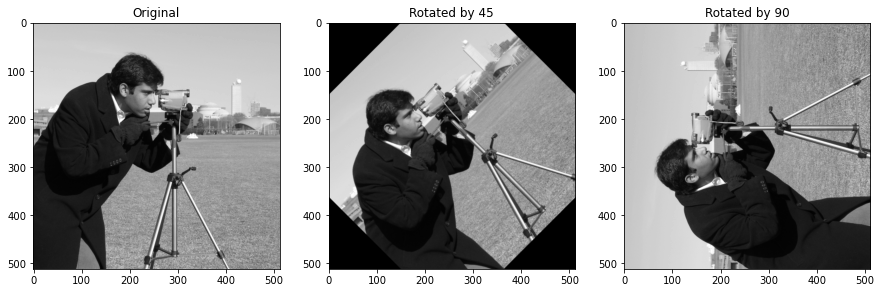

In [11]:
image = data.camera();
f,arr = plt.subplots(1,3,figsize=(15, 15));
plt.gray();

(h, w) = image.shape[:2];
(cX, cY) = (w // 2, h // 2);

M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0);
rotated45 = cv2.warpAffine(image, M, (w, h));

M = cv2.getRotationMatrix2D((cX, cY), 90, 1.0);
rotated90 = cv2.warpAffine(image, M, (w, h));

arr[0].imshow(image);
arr[0].set_title('Original');

arr[1].imshow(rotated45);
arr[1].set_title('Rotated by 45');

arr[2].imshow(rotated90);
arr[2].set_title('Rotated by 90');